# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

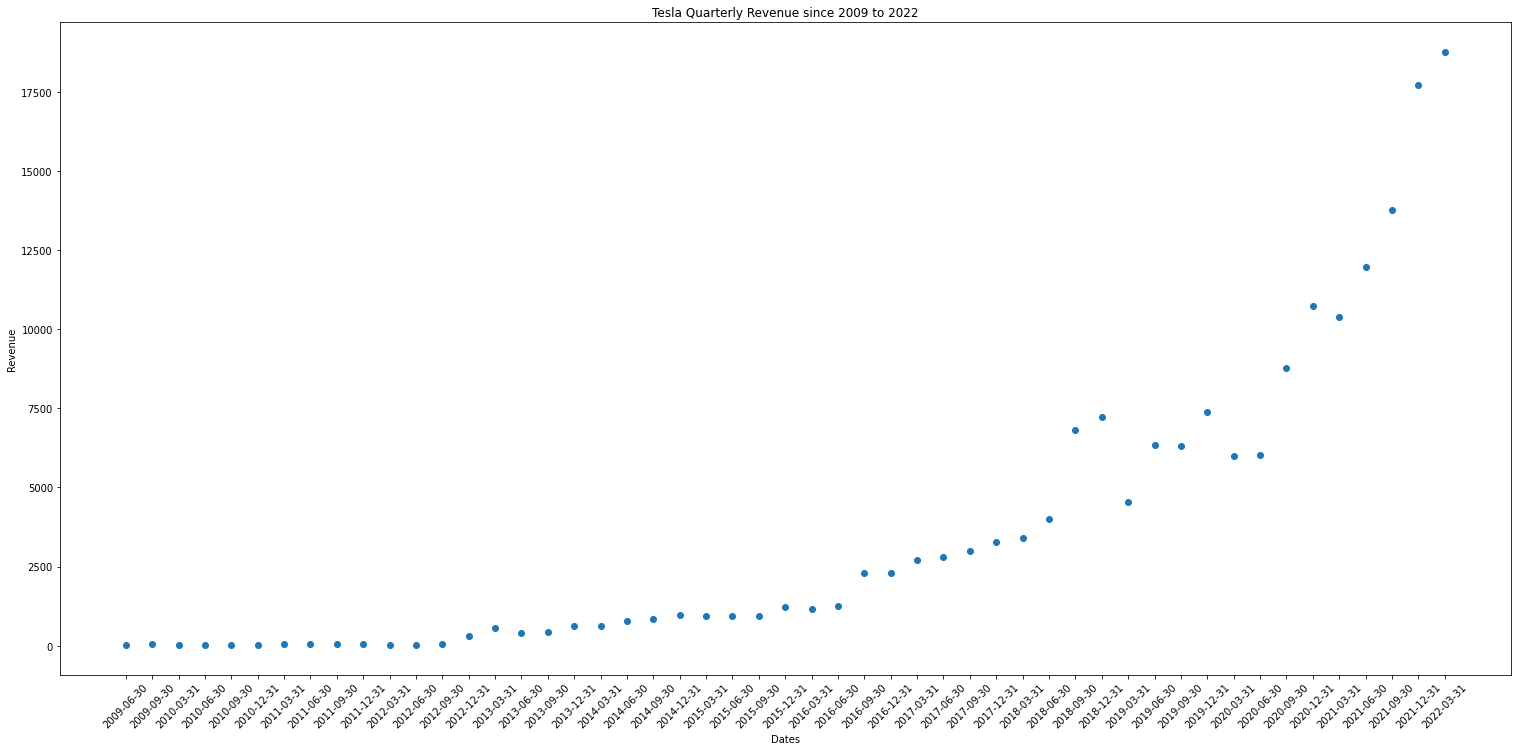

In [20]:
import sqlite3
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data,features='html.parser')

all_tables = soup.find_all('table')

index = 0
for i, table in enumerate(all_tables):
    if ('Tesla Quarterly Revenue' in str(table)):
        index = i
quarterly_data = all_tables[index]
data_body = quarterly_data.find('tbody')
rows = data_body.find_all('tr') #The rows format is Date - Revenue

tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

for row in rows:
    data = row.find_all('td')
    if len(data)>0:
        date = data[0].text
        revenue = data[1].text.replace('$','').replace(',','')
        # tesla_revenue.concat({'Date':date , 'Revenue':revenue}, ignore_index=True)
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date':[date],'Revenue':[revenue]})], ignore_index=True, axis=0)

any_na = tesla_revenue.isnull().values.any()

any_empty_date = tesla_revenue.loc[tesla_revenue['Date'] == '']
any_empty_revenue = tesla_revenue.loc[tesla_revenue['Revenue'] == '']
if len(any_empty_date)>0:
    tesla_revenue = tesla_revenue[tesla_revenue['Date'] != '']
if len(any_empty_revenue)>0:
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']

records = tesla_revenue.to_records(index=False)
tesla_revenue_list = list(records)


#Data visualization

import matplotlib.pyplot as plt
import numpy as np

dates = np.array(tesla_revenue['Date'])
dates = np.flip(dates)
revenues = np.array(tesla_revenue['Revenue'])
revenues = np.flip(revenues).astype('int')

plt.figure(figsize = [26,12])
plt.scatter(dates, revenues)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Revenue')
plt.title('Tesla Quarterly Revenue since 2009 to 2022')
plt.show()